# Understanding Over & Underfitting
## Predicting Boston Housing Prices

## Getting Started
In this project, you will use the Boston Housing Prices dataset to build several models to predict the prices of homes with particular qualities from the suburbs of Boston, MA.
We will build models with several different parameters, which will change the goodness of fit for each. 

---
## Data Exploration
Since we want to predict the value of houses, the **target variable**, `'MEDV'`, will be the variable we seek to predict.

### Import and explore the data. Clean the data for outliers and missing values. 

In [1]:
# Your code here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

c:\Users\ruoxi\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
df = pd.read_csv('../data/boston_data.csv')
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.15876,0.0,10.81,0.0,0.413,5.961,17.5,5.2873,4.0,305.0,19.2,376.94,9.88,21.7
1,0.10328,25.0,5.13,0.0,0.453,5.927,47.2,6.9320,8.0,284.0,19.7,396.90,9.22,19.6
2,0.34940,0.0,9.90,0.0,0.544,5.972,76.7,3.1025,4.0,304.0,18.4,396.24,9.97,20.3
3,2.73397,0.0,19.58,0.0,0.871,5.597,94.9,1.5257,5.0,403.0,14.7,351.85,21.45,15.4
4,0.04337,21.0,5.64,0.0,0.439,6.115,63.0,6.8147,4.0,243.0,16.8,393.97,9.43,20.5


In [3]:
df.info()
# I don't see any missing values, and all the variables are in the data type float

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404 entries, 0 to 403
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     404 non-null    float64
 1   zn       404 non-null    float64
 2   indus    404 non-null    float64
 3   chas     404 non-null    float64
 4   nox      404 non-null    float64
 5   rm       404 non-null    float64
 6   age      404 non-null    float64
 7   dis      404 non-null    float64
 8   rad      404 non-null    float64
 9   tax      404 non-null    float64
 10  ptratio  404 non-null    float64
 11  black    404 non-null    float64
 12  lstat    404 non-null    float64
 13  medv     404 non-null    float64
dtypes: float64(14)
memory usage: 44.3 KB


In [4]:
''' Variables in order:
 CRIM     per capita crime rate by town
 ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
 INDUS    proportion of non-retail business acres per town
 CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
 NOX      nitric oxides concentration (parts per 10 million)
 RM       average number of rooms per dwelling
 AGE      proportion of owner-occupied units built prior to 1940
 DIS      weighted distances to five Boston employment centres
 RAD      index of accessibility to radial highways
 TAX      full-value property-tax rate per $10,000
 PTRATIO  pupil-teacher ratio by town
 B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
 LSTAT    % lower status of the population
 MEDV     Median value of owner-occupied homes in $1000's'''

" Variables in order:\n CRIM     per capita crime rate by town\n ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n INDUS    proportion of non-retail business acres per town\n CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n NOX      nitric oxides concentration (parts per 10 million)\n RM       average number of rooms per dwelling\n AGE      proportion of owner-occupied units built prior to 1940\n DIS      weighted distances to five Boston employment centres\n RAD      index of accessibility to radial highways\n TAX      full-value property-tax rate per $10,000\n PTRATIO  pupil-teacher ratio by town\n B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town\n LSTAT    % lower status of the population\n MEDV     Median value of owner-occupied homes in $1000's"

In [5]:
# Let's see if the "chas" is actually binary
df['chas'].value_counts()

chas
0.0    376
1.0     28
Name: count, dtype: int64

In [6]:
# Check the the outliers for "medv"
Q1 = df['medv'].quantile(0.25)
Q3 = df['medv'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df[(df['medv'] < lower_bound) | (df['medv'] > upper_bound)]
print(outliers)

         crim    zn  indus  chas     nox     rm    age     dis   rad    tax  \
34   38.35180   0.0  18.10   0.0  0.6930  5.453  100.0  1.4896  24.0  666.0   
36    0.05602   0.0   2.46   0.0  0.4880  7.831   53.6  3.1992   3.0  193.0   
48    0.53412  20.0   3.97   0.0  0.6470  7.520   89.4  2.1398   5.0  264.0   
53    0.02177  82.5   2.03   0.0  0.4150  7.610   15.7  6.2700   2.0  348.0   
54    0.31533   0.0   6.20   0.0  0.5040  8.266   78.3  2.8944   8.0  307.0   
71    5.66998   0.0  18.10   1.0  0.6310  6.683   96.8  1.3567  24.0  666.0   
85    0.54050  20.0   3.97   0.0  0.5750  7.470   52.6  2.8720   5.0  264.0   
88    0.57834  20.0   3.97   0.0  0.5750  8.297   67.0  2.4216   5.0  264.0   
102   0.06588   0.0   2.46   0.0  0.4880  7.765   83.3  2.7410   3.0  193.0   
108   1.22358   0.0  19.58   0.0  0.6050  6.943   97.4  1.8773   5.0  403.0   
114  67.92080   0.0  18.10   0.0  0.6930  5.683  100.0  1.4254  24.0  666.0   
135   0.05780   0.0   2.46   0.0  0.4880  6.980   58

In [7]:
outliers.shape

(27, 14)

In [8]:
pd.set_option('display.max_rows', None)

In [9]:
outliers

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
34,38.35180,0.0,18.10,0.0,0.6930,5.453,100.0,1.4896,24.0,666.0,20.2,396.90,30.59,5.0
36,0.05602,0.0,2.46,0.0,0.4880,7.831,53.6,3.1992,3.0,193.0,17.8,392.63,4.45,50.0
48,0.53412,20.0,3.97,0.0,0.6470,7.520,89.4,2.1398,5.0,264.0,13.0,388.37,7.26,43.1
53,0.02177,82.5,2.03,0.0,0.4150,7.610,15.7,6.2700,2.0,348.0,14.7,395.38,3.11,42.3
54,0.31533,0.0,6.20,0.0,0.5040,8.266,78.3,2.8944,8.0,307.0,17.4,385.05,4.14,44.8
71,5.66998,0.0,18.10,1.0,0.6310,6.683,96.8,1.3567,24.0,666.0,20.2,375.33,3.73,50.0
85,0.54050,20.0,3.97,0.0,0.5750,7.470,52.6,2.8720,5.0,264.0,13.0,390.30,3.16,43.5
88,0.57834,20.0,3.97,0.0,0.5750,8.297,67.0,2.4216,5.0,264.0,13.0,384.54,7.44,50.0
102,0.06588,0.0,2.46,0.0,0.4880,7.765,83.3,2.7410,3.0,193.0,17.8,395.56,7.56,39.8
108,1.22358,0.0,19.58,0.0,0.6050,6.943,97.4,1.8773,5.0,403.0,14.7,363.43,4.59,41.3


In [10]:
#the proportion of the outliers
27/404

0.06683168316831684

In [12]:
# it's only 6% of data are outliers which means we can exclude it from feeding the model later on
# I also want to see if there are duplicates
df.duplicated().unique()
#and the answer is no

array([False])

In [13]:
#So let's remove the outliers and save the data into a new dataframe
housing = df.drop(outliers.index)
housing.shape

(377, 14)

### Next, we want to explore the data. Pick several varibables you think will be ost correlated with the prices of homes in Boston, and create plots that show the data dispersion as well as the regression line of best fit.

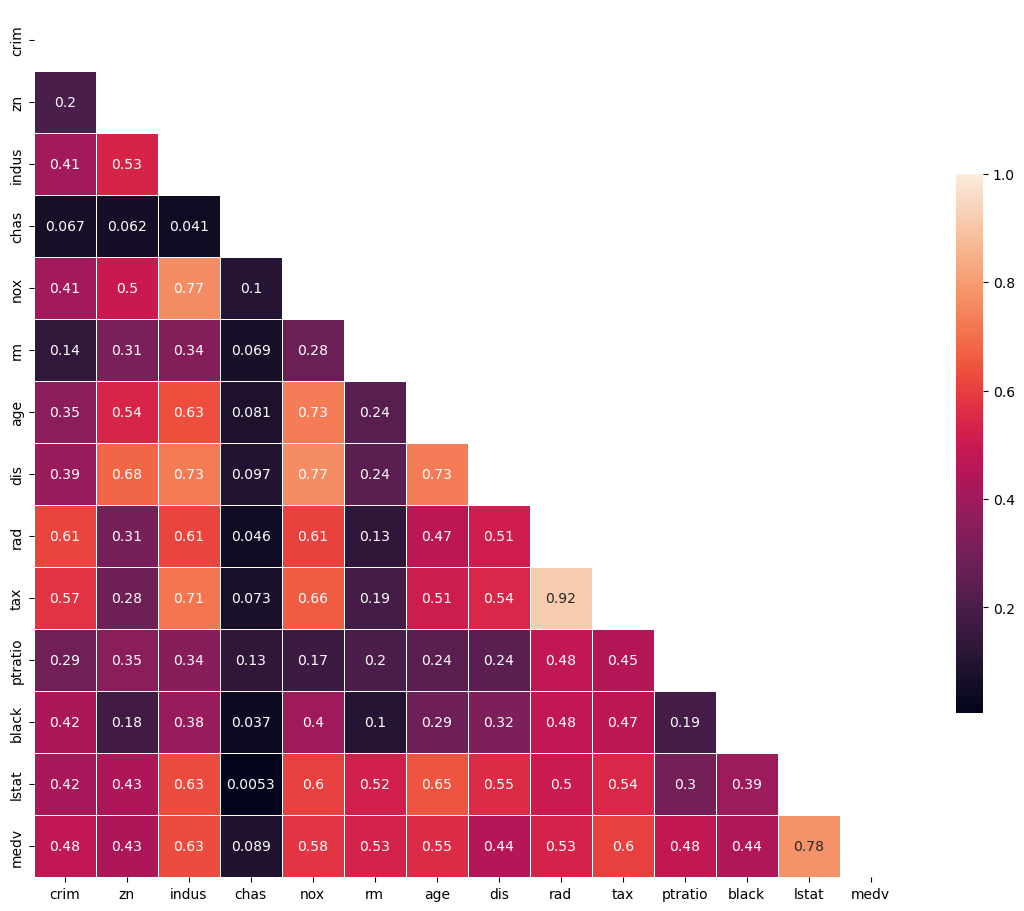

In [16]:
# Your plots here
#First we do correlation matrix plot
numeric_columns = housing.select_dtypes(include=np.number).columns
corr = np.abs(housing[numeric_columns].corr())

#Set up mask for triangle representation
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(14, 14))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,  vmax=1,square=True, linewidths=.5, cbar_kws={"shrink": .5},annot = corr)

plt.show()

In [17]:
'''"tax" and "rad" have very high correlation. To avoid collinearity, we keep only one of them. I'll drop "tax"'''
housing.drop(columns=['tax'],inplace=True)

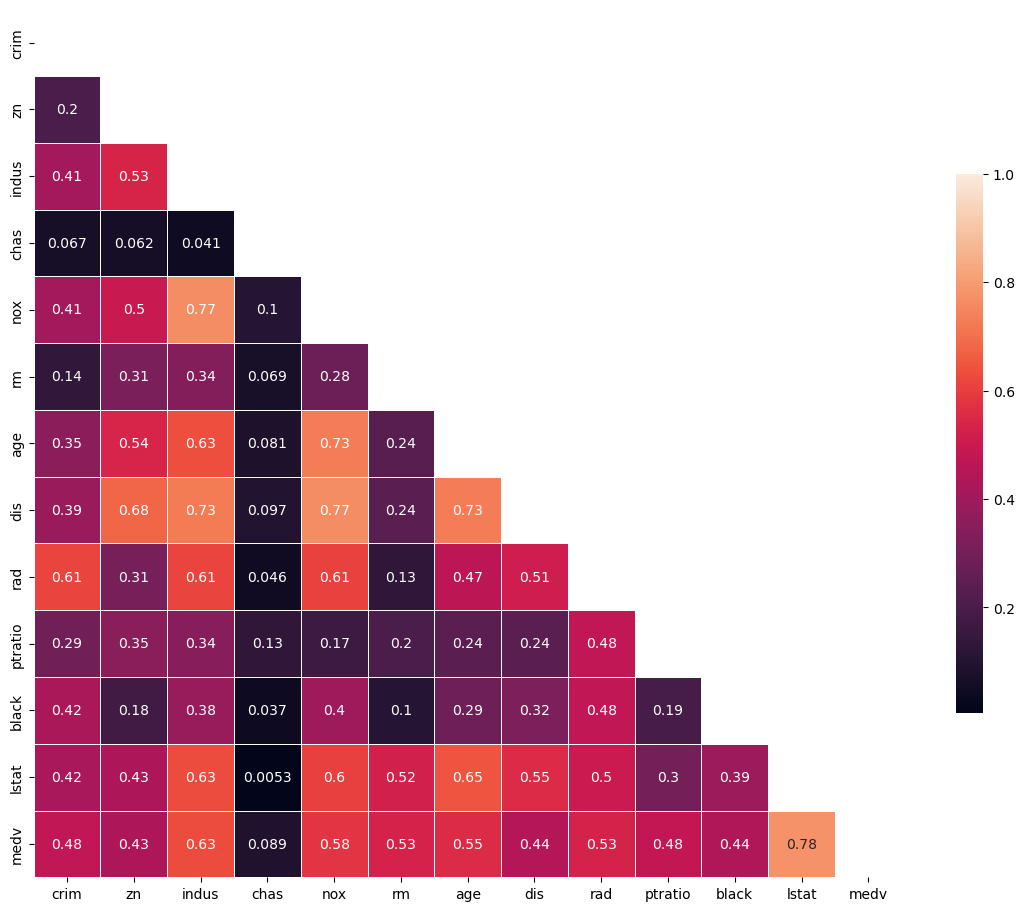

In [18]:
# dor the correlation matrix plot again
numeric_columns = housing.select_dtypes(include=np.number).columns
corr = np.abs(housing[numeric_columns].corr())

#Set up mask for triangle representation
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(14, 14))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,  vmax=1,square=True, linewidths=.5, cbar_kws={"shrink": .5},annot = corr)

plt.show()

c:\Users\ruoxi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\ruoxi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\ruoxi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\ruoxi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is 

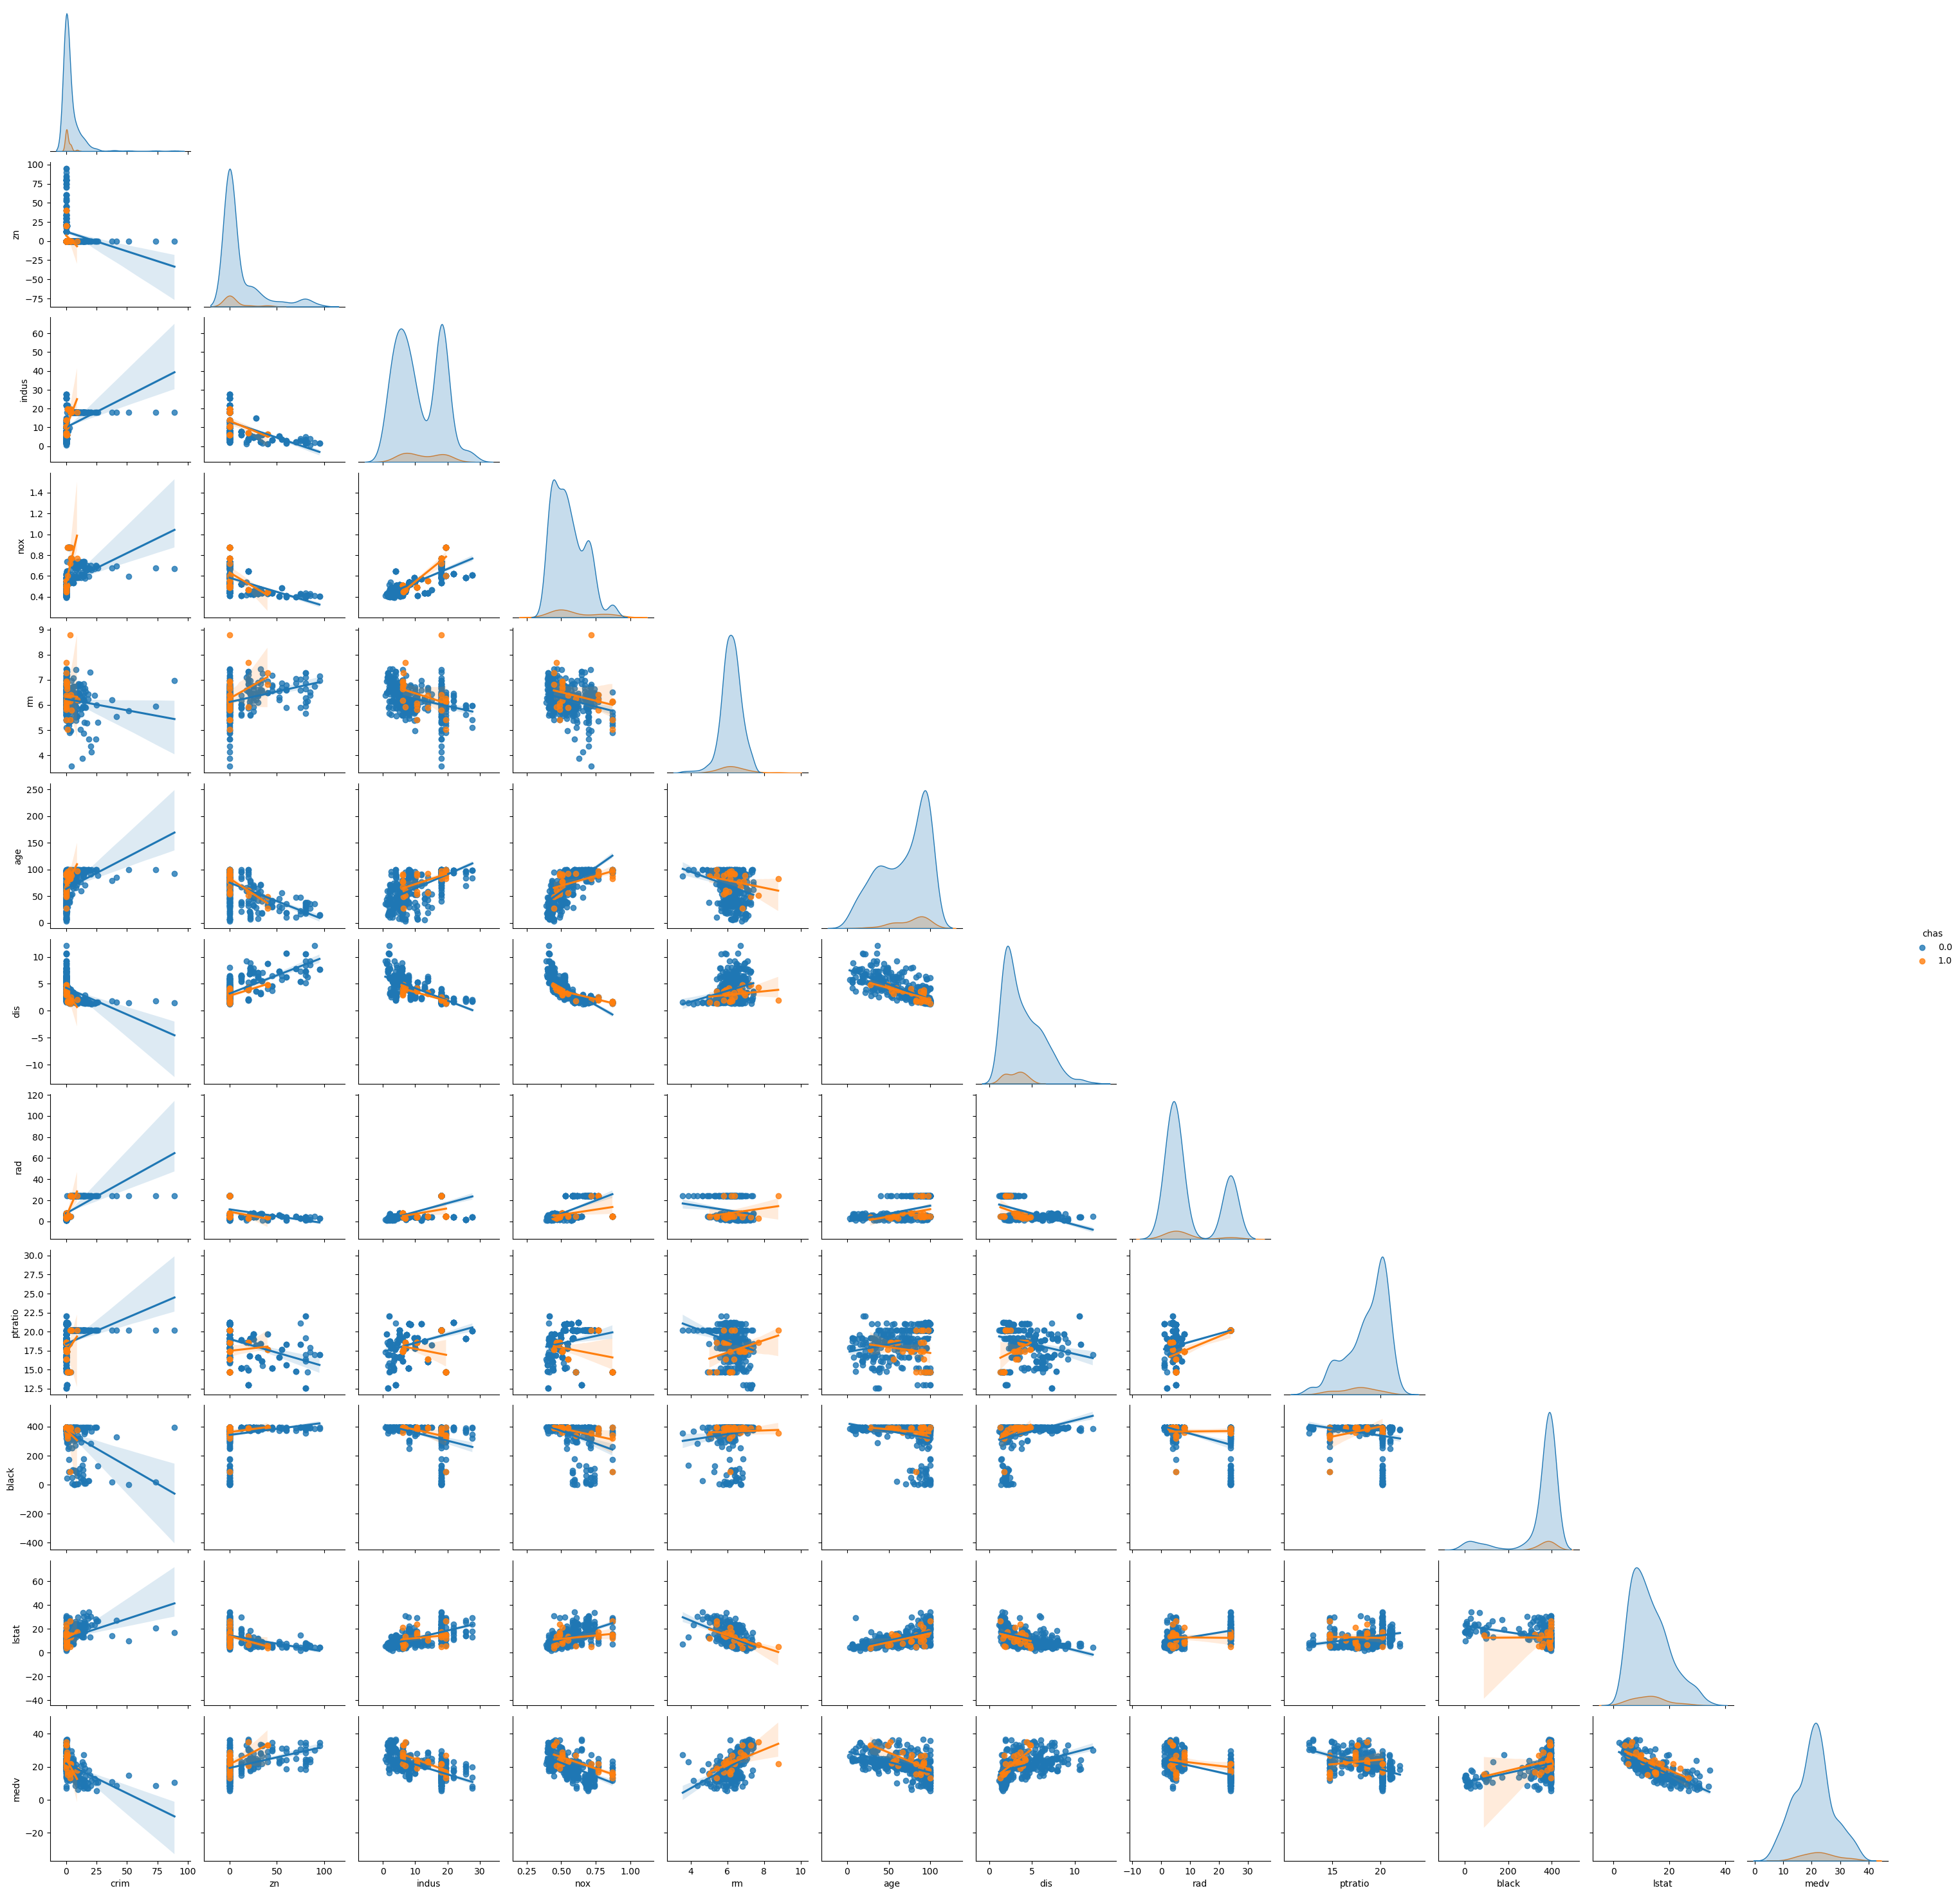

In [23]:
#Looks better now
# Let's pairplot the variables to see if there are some obvious patterns
sns.pairplot(housing, corner = True, hue = "chas", kind="reg")

In [21]:
# want to see what unique values are for "rad"
housing['rad'].value_counts()

rad
24.0    106
5.0      85
4.0      81
3.0      29
6.0      19
2.0      18
7.0      14
8.0      13
1.0      12
Name: count, dtype: int64

In [ ]:
# That explains why the data points are scattering in a strange way
# this vaiable looks more like catogorical to me as it is not continous value, I'll do target encoding after the train test split

<Axes: xlabel='chas', ylabel='medv'>

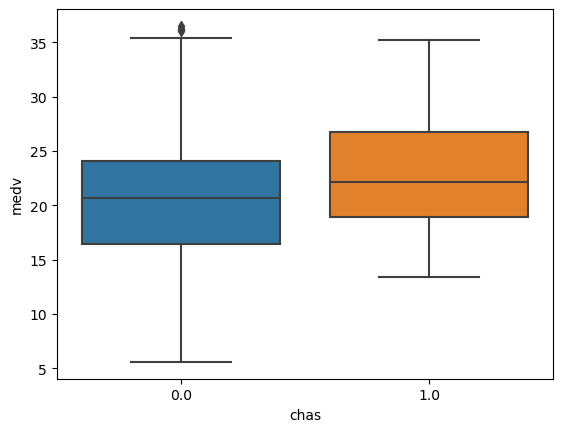

In [25]:
sns.boxplot(housing, x='chas', y='medv')

### What do these plots tell you about the relationships between these variables and the prices of homes in Boston? Are these the relationships you expected to see in these variables?

In [ ]:
# Your response here
'''
The "zn", "rm", "dis" have positive correlation with "medv";
"crim", "indus", "nox", "ptratio", and "lstat" have negative correlation with "medv"
Houses (tract bounds river) tend to have higher "medv" than other houses with the same other features
'''


### Make a heatmap of the remaining variables. Are there any variables that you did not consider that have very high correlations? What are they?

In [ ]:
# Your response here
#heatmaps were done earlier

### Calculate Statistics
Calculate descriptive statistics for housing price. Include the minimum, maximum, mean, median, and standard deviation. 

In [24]:
# Your code here
housing.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,ptratio,black,lstat,medv
count,377.000000,377.000000,377.000000,377.000000,377.000000,377.000000,377.000000,377.000000,377.000000,377.000000,377.000000,377.000000,377.000000
mean,3.629924,10.070292,11.360584,0.063660,0.557573,6.212202,68.490186,3.848430,9.931034,18.581167,352.830398,13.073528,20.841379
std,8.416852,21.262286,6.753232,0.244472,0.119133,0.569330,27.956632,2.122297,8.908848,2.056940,97.404976,6.726074,6.449545
min,0.006320,0.000000,0.740000,0.000000,0.392000,3.561000,2.900000,1.178100,1.000000,12.600000,0.320000,1.980000,5.600000
25%,0.082440,0.000000,5.640000,0.000000,0.449000,5.888000,45.800000,2.100700,4.000000,17.400000,374.560000,7.600000,16.600000
50%,0.239120,0.000000,9.900000,0.000000,0.538000,6.209000,76.500000,3.317500,5.000000,19.100000,391.270000,11.740000,20.900000
75%,4.222390,12.500000,18.100000,0.000000,0.647000,6.546000,94.100000,5.287300,24.000000,20.200000,396.210000,17.120000,24.200000
max,88.976200,95.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,22.000000,396.900000,34.370000,36.500000


----

## Developing a Model

### Implementation: Define a Performance Metric
What is the performance meteric with which you will determine the performance of your model? Create a function that calculates this performance metric, and then returns the score. 

In [45]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """
    r2 = r2_score(y_true, y_predict)
    mae = mean_absolute_error(y_true, y_predict)
    mse = mean_squared_error(y_true, y_predict)

    print(f'The R2 score is: {r2}')
    print(f'The MAE is: {mae}')
    print(f'The MSE is: {mse}')

    return [r2, mae, mse]

### Implementation: Shuffle and Split Data
Split the data into the testing and training datasets. Shuffle the data as well to remove any bias in selecting the traing and test. 

In [28]:
# Your code here
from sklearn.model_selection import train_test_split
X = housing.drop(columns=['medv'])
y = housing['medv']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10)
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (282, 12)
y_train shape: (282,)
X_test shape: (95, 12)
y_test shape: (95,)


In [38]:
# As I mentioned before, I want to target encoding the "rad", and create a new column "avg_medv_rad"
train = pd.concat((X_train, y_train), axis =1)
avg_medv_rad = train.groupby('rad')['medv'].agg('mean').to_dict()
avg_medv_rad

{1.0: 23.925,
 2.0: 24.96666666666667,
 3.0: 27.514999999999997,
 4.0: 20.851724137931036,
 5.0: 22.879661016949154,
 6.0: 21.95,
 7.0: 24.858333333333334,
 8.0: 26.060000000000002,
 24.0: 15.069662921348316}

In [39]:
X_train['avg_medv_rad'] = X_train['rad'].replace(avg_medv_rad)
X_train.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,ptratio,black,lstat,avg_medv_rad
210,0.55007,20.0,3.97,0.0,0.647,7.206,91.6,1.9301,5.0,13.0,387.89,8.10,22.879661
385,3.67367,0.0,18.10,0.0,0.583,6.312,51.9,3.9917,24.0,20.2,388.62,10.58,15.069663
116,41.52920,0.0,18.10,0.0,0.693,5.531,85.4,1.6074,24.0,20.2,329.46,27.38,15.069663
20,9.33889,0.0,18.10,0.0,0.679,6.380,95.6,1.9682,24.0,20.2,60.72,24.08,15.069663
64,0.04203,28.0,15.04,0.0,0.464,6.442,53.6,3.6659,4.0,18.2,395.01,8.16,20.851724


In [41]:
#drop the column "rad"
X_train.drop(columns = ['rad'], inplace=True)

In [40]:
X_test['avg_medv_rad'] = X_test['rad'].replace(avg_medv_rad)
X_test.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,ptratio,black,lstat,avg_medv_rad
403,0.08244,30.0,4.93,0.0,0.428,6.481,18.5,6.1899,6.0,16.6,379.41,6.36,21.950000
346,0.10000,34.0,6.09,0.0,0.433,6.982,17.7,5.4917,7.0,16.1,390.43,4.86,24.858333
236,0.22489,12.5,7.87,0.0,0.524,6.377,94.3,6.3467,5.0,15.2,392.52,20.45,22.879661
169,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,15.2,386.71,17.10,22.879661
389,0.22969,0.0,10.59,0.0,0.489,6.326,52.5,4.3549,4.0,18.6,394.87,10.97,20.851724


In [42]:
X_test.drop(columns = ['rad'], inplace=True)

In [43]:
# Perform standardization on the independent varibales
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled =scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

----

## Analyzing Model Performance
Next, we are going to build a Random Forest Regressor, and test its performance with several different parameter settings.

### Learning Curves
Lets build the different models. Set the max_depth parameter to 2, 4, 6, 8, and 10 respectively. 

In [46]:
# Five separate RFR here with the given max depths
from sklearn.ensemble import RandomForestRegressor

performance_train = {"R2":[], "MAE":[], "MSE":[]}
performance_test = {"R2":[], "MAE":[], "MSE":[]}
for depth in [2,4,6,8,10]:
    forest = RandomForestRegressor(n_estimators=10, 
                               max_depth=depth, 
                               random_state=10) 
    forest.fit(X_train_scaled, y_train)
    y_test_pred = forest.predict(X_test_scaled)
    y_train_pred = forest.predict(X_train_scaled)
    print("Training Performance:")
    performance_train_depth = performance_metric(y_train, y_train_pred)
    performance_train["R2"].append(performance_train_depth[0])
    performance_train["MAE"].append(performance_train_depth[1])
    performance_train["MSE"].append(performance_train_depth[2])

    print("Testing Performance:")
    performance_test_depth = performance_metric(y_test, y_test_pred)
    performance_test["R2"].append(performance_test_depth[0])
    performance_test["MAE"].append(performance_test_depth[1])
    performance_test["MSE"].append(performance_test_depth[2])

Training Performance:
The R2 score is: 0.761588525806435
The MAE is: 2.5085868166187972
The MSE is: 10.364469536554246
Testing Performance:
The R2 score is: 0.6685880349108351
The MAE is: 2.571991607595469
The MSE is: 11.559012590678533
Training Performance:
The R2 score is: 0.8839105138007641
The MAE is: 1.7585590814011336
The MSE is: 5.046761894728849
Testing Performance:
The R2 score is: 0.769523000907347
The MAE is: 2.1675416904801805
The MSE is: 8.038594906062066
Training Performance:
The R2 score is: 0.9388366220417733
The MAE is: 1.2829411009984246
The MSE is: 2.6589574589271354
Testing Performance:
The R2 score is: 0.7879274969073574
The MAE is: 2.09407745669557
The MSE is: 7.396681446685377
Training Performance:
The R2 score is: 0.9581578393202376
The MAE is: 0.9872111416167085
The MSE is: 1.81900557083469
Testing Performance:
The R2 score is: 0.8039497521009004
The MAE is: 1.9588967066978058
The MSE is: 6.837855969568401
Training Performance:
The R2 score is: 0.96441469978201

In [47]:
# Create DataFrames from dictionaries with [2, 4, 6, 8, 10] as index
df_performance_train = pd.DataFrame(performance_train, index=[2, 4, 6, 8, 10])
df_performance_test = pd.DataFrame(performance_test, index=[2, 4, 6, 8, 10])

In [48]:
display(df_performance_train)
display(df_performance_test)

,R2,MAE,MSE
2,0.761589,2.508587,10.364470
4,0.883911,1.758559,5.046762
6,0.938837,1.282941,2.658957
8,0.958158,0.987211,1.819006
10,0.964415,0.884748,1.547001


,R2,MAE,MSE
2,0.668588,2.571992,11.559013
4,0.769523,2.167542,8.038595
6,0.787927,2.094077,7.396681
8,0.803950,1.958897,6.837856
10,0.800664,1.995337,6.952467


Now, plot the score for each tree on the training set and on the testing set.

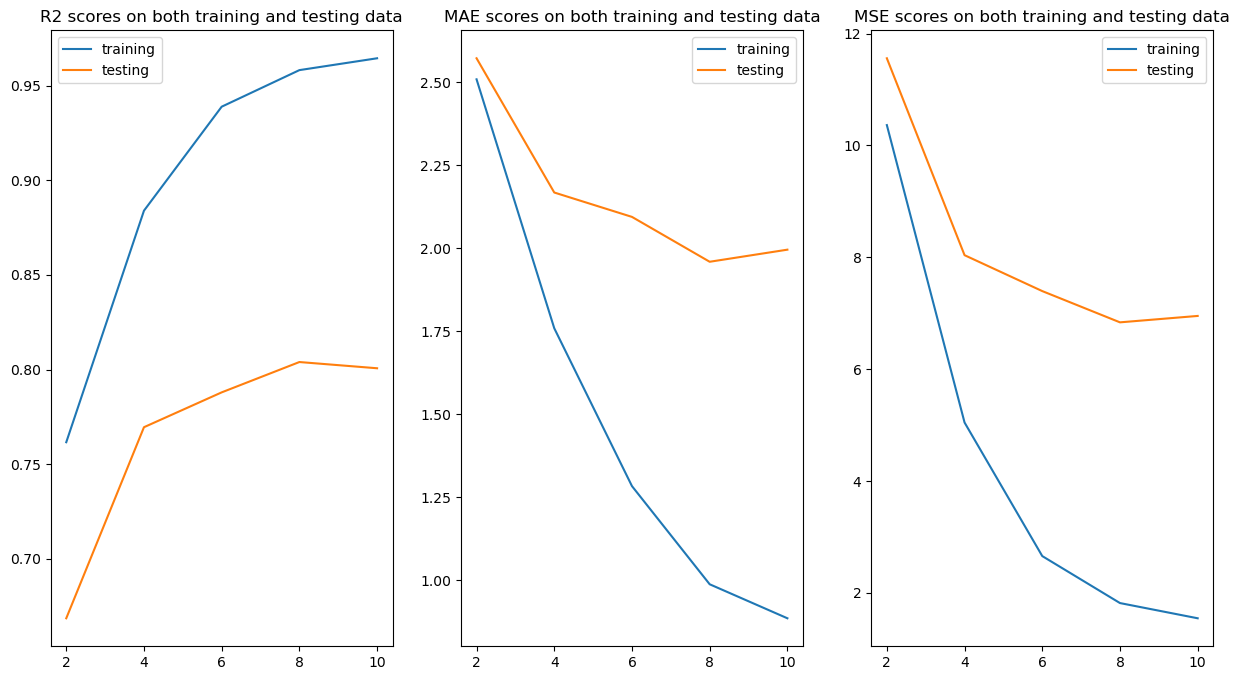

In [54]:
# Produce a plot with the score for the testing and training for the different max depths
# create subplots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 8))

plt.sca(axes[0])
plt.plot(df_performance_train['R2'], label='training')
plt.plot(df_performance_test['R2'], label='testing')
plt.legend()
plt.xticks([2, 4, 6, 8, 10])
plt.title('R2 scores on both training and testing data')
plt.sca(axes[1])
plt.plot(df_performance_train['MAE'], label='training')
plt.plot(df_performance_test['MAE'], label='testing')
plt.legend()
plt.xticks([2, 4, 6, 8, 10])
plt.title('MAE scores on both training and testing data')
plt.sca(axes[2])
plt.plot(df_performance_train['MSE'], label='training')
plt.plot(df_performance_test['MSE'], label='testing')
plt.legend()
plt.xticks([2, 4, 6, 8, 10])
plt.title('MSE scores on both training and testing data')
plt.show()

What do these results tell you about the effect of the depth of the trees on the performance of the model?

In [ ]:
# Your response here
'''The best performance is given by max_depth = 8, with highest R2 score, lowest MAE and MSE on the testing dataset;
The preformance on the training dataset is always better than it on the testing dataset, which means the model is overfitting'''

### Bias-Variance Tradeoff
When the model is trained with a maximum depth of 1, does the model suffer from high bias or from high variance? How about when the model is trained with a maximum depth of 10? Check out this article before answering: https://towardsdatascience.com/understanding-the-bias-variance-tradeoff-165e6942b229

In [ ]:
# Your response here
# if the max_depth is only 1, then the model is most likely underfit, which leads to high bias, and for max_depth 10, it's most like to give high variance as the mdoel will overfit on the training dataset

### Best-Guess Optimal Model
What is the max_depth parameter that you think would optimize the model? Run your model and explain its performance.

In [55]:
# Your response here
# since the scores produced from the given values of max_depth indicate that 8 is the best one, and the R2 scores are improving before 8, I will try 9 to see if this makes the performance better or worse

forest = RandomForestRegressor(n_estimators=10, 
                            max_depth=9, 
                            random_state=10) 
forest.fit(X_train_scaled, y_train)
y_test_pred = forest.predict(X_test_scaled)
y_train_pred = forest.predict(X_train_scaled)
display(performance_metric(y_train, y_train_pred))
display(performance_metric(y_test, y_test_pred))

The R2 score is: 0.963206169414627
The MAE is: 0.9127739314553868
The MSE is: 1.5995393574288346


[0.963206169414627, 0.9127739314553868, 1.5995393574288346]

The R2 score is: 0.8026267086047861
The MAE is: 1.9088599189338353
The MSE is: 6.884001184710179


[0.8026267086047861, 1.9088599189338353, 6.884001184710179]

In [ ]:
# Turns out that max_depth=8 still gives better result

### Applicability
*In a few sentences, discuss whether the constructed model should or should not be used in a real-world setting.*  
**Hint:** Some questions to answering:
- *How relevant today is data that was collected from 1978?*
- *Are the features present in the data sufficient to describe a home?*
- *Is the model robust enough to make consistent predictions?*
- *Would data collected in an urban city like Boston be applicable in a rural city?*

In [ ]:
# Your response here
'''this dataset is too outdated for real-life senarios, and the buying power of the money shrinks dramatically druing the past decades;
layout of the city has been changing dramatically as well;
infrastructions of different cities are different and have been improving constantly'''